# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

## Abriendo csv's

In [3]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [4]:
char_csv=pd.read_csv(characterization_path/'24-ago-2021'/'curvelet_abide_adults_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'24-ago-2021'/'curvelet_abide_adults_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [5]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [6]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,45.0,Amygdala_L,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.092684,0.751493,0.091313,...,2.648998e-03,0.001477,0.417342,-6.146305e-19,0.002814,0.488632,-0.000475,0.003167,0.508253,-2.120066e-10
1,46.0,Amygdala_R,29007.0,1.0,ABIDE-II,BNI_1,41.0,1.475468,0.977703,1.100462,...,8.476276e-03,0.055584,0.901106,5.773145e-19,0.046615,0.881068,0.001264,0.034842,0.855190,-2.007423e-07
2,37.0,Cingulate_Mid_L,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.002120,0.242815,1.831240,...,-8.998341e-19,0.000004,0.204150,-4.952947e-20,0.000003,0.205765,-0.001111,0.000002,0.204080,-1.736740e-10
3,153.0,ACC_pre_L,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.402810,0.563233,1.316927,...,-2.207830e-18,0.030809,0.667908,-7.907010e-19,0.035715,0.774840,0.004955,0.021131,0.739292,4.959036e-09
4,155.0,ACC_sup_L,29007.0,1.0,ABIDE-II,BNI_1,41.0,0.010581,0.349060,0.311938,...,-6.630381e-19,0.000086,0.278424,-5.112498e-20,0.000149,0.299147,-0.000373,0.000085,0.284487,-3.996872e-07


In [7]:
display(char_csv.query('region_name=="Amygdala_L"'))

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,45.0,Amygdala_L,29007.0,1.0,ABIDE-II,BNI_1,41.0000,0.092684,0.751493,0.091313,...,2.648998e-03,0.001477,0.417342,-6.146305e-19,0.002814,0.488632,-0.000475,0.003167,0.508253,-2.120066e-10
24,45.0,Amygdala_L,29028.0,1.0,ABIDE-II,BNI_1,21.0000,0.105142,0.687981,0.124657,...,3.265362e-20,0.005455,0.494330,8.249574e-19,0.003698,0.482188,0.004266,0.011948,0.670840,-2.569961e-19
48,45.0,Amygdala_L,29029.0,1.0,ABIDE-II,BNI_1,20.0000,0.106317,0.698119,0.122210,...,-2.372489e-18,0.002713,0.447867,8.104943e-19,0.004957,0.538789,-0.004321,0.007187,0.602375,-4.400871e-07
72,45.0,Amygdala_L,29031.0,1.0,ABIDE-II,BNI_1,21.0000,0.052836,0.511401,0.160499,...,-4.832444e-19,0.003014,0.455002,2.217316e-19,0.001949,0.429458,-0.000692,0.002429,0.458788,-3.739297e-06
96,45.0,Amygdala_L,29037.0,1.0,ABIDE-II,BNI_1,19.0000,0.093414,0.702503,0.102638,...,5.779330e-03,0.001410,0.412568,-9.869978e-20,0.002898,0.479944,-0.002130,0.002064,0.456376,-1.096192e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10632,45.0,Amygdala_L,50508.0,1.0,ABIDE-I,USM,26.3792,0.070522,0.642686,0.102152,...,-1.510230e-19,0.001886,0.424250,4.613883e-19,0.001268,0.406524,0.001771,0.001713,0.432204,9.826320e-20
10656,45.0,Amygdala_L,50514.0,1.0,ABIDE-I,USM,21.4018,0.079551,0.644978,0.119441,...,7.313050e-19,0.003801,0.462174,-3.571490e-19,0.003674,0.469037,-0.001366,0.003472,0.483028,-1.669233e-07
10680,45.0,Amygdala_L,50525.0,1.0,ABIDE-I,USM,32.8487,0.083605,0.632854,0.126665,...,-8.054073e-20,0.001385,0.392356,6.619340e-19,0.002708,0.460699,-0.003224,0.003051,0.479485,-1.707852e-06
10704,45.0,Amygdala_L,50529.0,1.0,ABIDE-I,USM,42.3354,0.159811,0.787846,0.127584,...,5.189344e-20,0.002037,0.421066,3.187740e-19,0.002956,0.488256,-0.001642,0.004958,0.557645,1.213488e-07


In [8]:
def filter_bad_1(bad_str):
    s = bad_str.split('characterization issue on region')
    if len(s)>1:
        return int(s[1])
    else:
        return 54

In [9]:
bad_log_csv['region_issue'] = [filter_bad_1(stri) for stri in bad_log_csv['bad_log_cell1'].values]

In [10]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4,region_issue
0,characterization issue on region 8,29039,BNI_1,ABIDE-II,8
1,characterization issue on region 9,29055,BNI_1,ABIDE-II,9
2,characterization issue on region 8,30151,BNI_1,ABIDE-II,8
3,characterization issue on region 9,30151,BNI_1,ABIDE-II,9
4,characterization issue on region 8,29022,BNI_1,ABIDE-II,8
...,...,...,...,...,...
93,characterization issue on region 5,50495,USM,ABIDE-I,5
94,characterization issue on region 8,50497,USM,ABIDE-I,8
95,characterization issue on region 8,50503,USM,ABIDE-I,8
96,characterization issue on region 9,50505,USM,ABIDE-I,9


In [11]:
#int_regions = [i+3 for i in range(11)]
#bad_log_final = bad_log_csv[bad_log_csv['region_issue'].isin(int_regions)]
#display(bad_log_final)

In [12]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_csv['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])

print(regions)
print(region_idx)

regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

region_list = regions

#region_list=['Amygdala_L', 'Amygdala_R', 'Frontal_Sup_2_R', 'Frontal_Mid_2_R', 'Frontal_Sup_Medial_R',
#            'Cingulate_Mid_L', 'ACC_pre_L', 'ACC_sup_L', 'Frontal_Sup_2_L', 'Frontal_Mid_2_L', 'Frontal_Sup_Medial_L',
#            'Supp_Motor_Area_L', 'Cingulate_Mid_R', 'ACC_pre_R', 'ACC_sup_R', 'SupraMarginal_R', 'Frontal_Med_Orb_L', 
#             'Rectus_L', 'Frontal_Med_Orb_R', 'Rectus_R', 'Parietal_Inf_L', 'Angular_L', 'Temporal_Sup_L', 'Fusiform_R']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

print('len region list: ', len(region_list))  
print('len region idx: ', len(region_idx)) 

#region_list=['left frontal medial cortex']
#region_idx=[49]

[29039, 29055, 30151, 30151, 29022, 29032, 29035, 29057, 29057, 29058, 29062, 29066, 29074, 29076, 29077, 29082, 29086, 29090, 29091, 29539, 29569, 29557, 29564, 29573, 29657, 29660, 29666, 29796, 28683, 28683, 28704, 28705, 28717, 28721, 28729, 28733, 51459, 51464, 51466, 51468, 51476, 51484, 51485, 51489, 51489, 50646, 50653, 50658, 50666, 50668, 50682, 50686, 50686, 50690, 50695, 50703, 50707, 50710, 51318, 51320, 51323, 51338, 51341, 51342, 51367, 51369, 51017, 51017, 51027, 51028, 51068, 51114, 51116, 51146, 51146, 51147, 51149, 51149, 50107, 50016, 50020, 50052, 50058, 51562, 51580, 50237, 50388, 50439, 50446, 50455, 50471, 50471, 50482, 50495, 50497, 50503, 50505, 50508, 50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353]
['Amygdala_L' 'Amygdala_R' 'Cingulate_Mid_L' 'ACC_pre_L' 'ACC_sup_L'
 'Cingulate_Mid_R' 'ACC_pre_R' 'ACC_sup_R' 'SupraMarginal_R'
 'Temporal_Sup_L' 'Fusiform_R' 'Fron

,region
index,
45.0,Amygdala_L
46.0,Amygdala_R
37.0,Cingulate_Mid_L
153.0,ACC_pre_L
155.0,ACC_sup_L
38.0,Cingulate_Mid_R
154.0,ACC_pre_R
156.0,ACC_sup_R
68.0,SupraMarginal_R


len region list:  24
len region idx:  24


In [13]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [14]:
colors=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff']]

colors=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#d5a18e', '#dec3be'],
        ['#13505b', '#040404'],
        ['#e26d5c','#723d46'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9']]

In [15]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [16]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [17]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [18]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1296
266
ninos:  337
ninos ASD:  167
ninos control:  170
(266, 261)
{'ASD': 130, 'CONTROL': 136}
{'ASD': 130, 'CONTROL': 136}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,4.0,Frontal_Sup_2_R,29588.0,1.0,ABIDE-II,IP_1,19.7100,0.068948,0.408286,1.702857,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,19.7100,1.0
1,4.0,Frontal_Sup_2_R,29595.0,1.0,ABIDE-II,IP_1,27.3600,0.109760,0.430701,1.886479,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,27.3600,1.0
2,4.0,Frontal_Sup_2_R,29627.0,1.0,ABIDE-II,IP_1,21.1200,0.120570,0.440243,1.854125,...,IP_1,ABIDE-II,1,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,21.1200,1.0
3,4.0,Frontal_Sup_2_R,29580.0,2.0,ABIDE-II,IP_1,24.2600,0.112761,0.430705,1.966275,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,24.2600,0.0
4,4.0,Frontal_Sup_2_R,29583.0,2.0,ABIDE-II,IP_1,22.4600,0.119388,0.435116,1.921231,...,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,22.4600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,4.0,Frontal_Sup_2_R,50507.0,1.0,ABIDE-I,USM,28.1095,0.064889,0.398116,1.738100,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,28.1095,1.0
262,4.0,Frontal_Sup_2_R,50514.0,1.0,ABIDE-I,USM,21.4018,0.056339,0.395450,1.585413,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,21.4018,1.0
263,4.0,Frontal_Sup_2_R,50525.0,1.0,ABIDE-I,USM,32.8487,0.035265,0.383573,1.231948,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,32.8487,1.0
264,4.0,Frontal_Sup_2_R,50529.0,1.0,ABIDE-I,USM,42.3354,0.036258,0.378109,1.460269,...,USM,ABIDE-I,1,1,University of Utah School of Medicine,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.2,42.3354,1.0


datos de ASD: mean: 0.02213970361022438  std: 0.896653979244944
datos de Control: mean: -0.021162951980363155  std: 1.0892417808108623


(array([ 6.,  4., 11.,  9., 11., 18., 19., 13., 13., 13.,  3.,  6.,  5.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.]),
 array([-1.8096024 , -1.5490662 , -1.28853   , -1.0279938 , -0.7674576 ,
        -0.5069214 , -0.2463852 ,  0.01415101,  0.27468721,  0.53522341,
         0.79575961,  1.05629581,  1.31683201,  1.57736821,  1.83790441,
         2.09844062,  2.35897682,  2.61951302,  2.88004922,  3.14058542,
         3.40112162,  3.66165782,  3.92219403,  4.18273023,  4.44326643,
         4.70380263,  4.96433883,  5.22487503,  5.48541123,  5.74594744,
         6.00648364]),
 <a list of 30 Patch objects>)

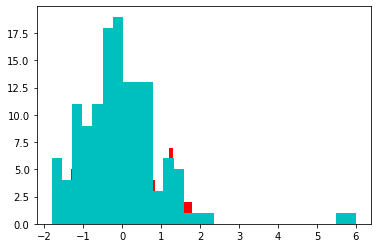

In [19]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==4]
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in discard_q_csv['ID'].values:
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

print(len(np.unique(features_merge['subject_id'])))

print('ninos: ', len(phen_csv.query('EDAD>=19')))
print('ninos ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
print('ninos control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

#pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv('adults_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [20]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['BNI_1', 'ETH_1', 'IP_1', 'IU_1', 'KUL_3', 'NYU_1', 'ONRC_2',
       'TCD_1', 'USM_1', 'Caltech', 'CMU', 'Leuven', 'MaxMun', 'NYU',
       'Olin', 'Pitt', 'SBL', 'Trinity', 'UM', 'USM'], dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [21]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [22]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [23]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [24]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [25]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [26]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

In [27]:
#map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [28]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx].dropna()
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    print(features_merge)
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+'/results/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+'/results/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+'/results/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+'/results/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+'/results/'+region_name):
        os.makedirs(os.getcwd()+'/results/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+'/results/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Amygdala_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            45.0  Amygdala_L     29588.0       1.0  ABIDE-II    IP_1   
1            45.0  Amygdala_L     29595.0       1.0  ABIDE-II    IP_1   
2            45.0  Amygdala_L     29627.0       1.0  ABIDE-II    IP_1   
3            45.0  Amygdala_L     29580.0       2.0  ABIDE-II    IP_1   
4            45.0  Amygdala_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261          45.0  Amygdala_L     50507.0       1.0   ABIDE-I     USM   
262          45.0  Amygdala_L     50514.0       1.0   ABIDE-I     USM   
263          45.0  Amygdala_L     50525.0       1.0   ABIDE-I     USM   
264          45.0  Amygdala_L     50529.0       1.0   ABIDE-I     USM   
265          45.0  Amygdala_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.194821  0.876290

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:59<00:00,  4.05it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.027806110030949592
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.05843122724733658
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.15661922786338733
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.29195854236882457
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.30523356101349786
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.39072334372817774
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2222820552935017
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3928713483753044
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1970515256296061
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2382652126898548
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2437295758476653
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1970515256296061
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.35840585584776563
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1663748064545662
caracteristica numero: 15
sub-banda: 5
t-test: 0.

caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.0691723936377841
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.46284374118969823
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.06666281081255834
caracteristica numero: 158
sub-banda: 53
t-test: 0.20542431622234028
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.48823443776418
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.09896563416770199
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.09676228351775235
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.48823443776418
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.33313174107025856
caracteristica numero: 164
sub-banda: 55
t-test: 0.8080408968420462
caracteristica numero: 165
sub-banda: 55
t-test: 0.4560504005830842
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.21991488371018153
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.24523151294956302
caracteristica numero: 168
sub-banda: 56
t-test: 0.6838168024497984
caracteristica numero: 1

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Amygdala_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            46.0  Amygdala_R     29588.0       1.0  ABIDE-II    IP_1   
1            46.0  Amygdala_R     29595.0       1.0  ABIDE-II    IP_1   
2            46.0  Amygdala_R     29627.0       1.0  ABIDE-II    IP_1   
3            46.0  Amygdala_R     29580.0       2.0  ABIDE-II    IP_1   
4            46.0  Amygdala_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261          46.0  Amygdala_R     50507.0       1.0   ABIDE-I     USM   
262          46.0  Amygdala_R     50514.0       1.0   ABIDE-I     USM   
263          46.0  Amygdala_R     50525.0       1.0   ABIDE-I     USM   
264          46.0  Amygdala_R     50529.0       1.0   ABIDE-I     USM   
265          46.0  Amygdala_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.506090  0.561397

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:58<00:00,  4.18it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.25485824744878166
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4413762519546843
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1589255104533418
caracteristica numero: 4
sub-banda: 2
t-test: 0.44047831880054533
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.016548740083592244
caracteristica numero: 6
sub-banda: 2
t-test: 0.10405530881778959
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.19440803727974998
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.13270832762156887
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.17038460686551432
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3279318033412102
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4338370906617754
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.17038460686551432
caracteristica numero: 13
sub-banda: 5
t-test: 0.48881820434916956
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.49204966934469324
caracteristica numero: 15
sub-banda: 5
t-test: 0.739

caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.0510198795564948
caracteristica numero: 138
sub-banda: 46
t-test: 0.09899213883922393
caracteristica numero: 139
sub-banda: 47
t-test: 0.022045790447269353
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.04104557753332735
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.44483817979153106
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.08528478046604637
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.2218074612957044
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.47679659545242575
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.049045781421333
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.14324617985931953
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.37611832840917336
caracteristica numero: 148
sub-banda: 50
t-test: 0.059604540073773936
caracteristica numero: 149
sub-banda: 50
t-test: 0.04645625456425603
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.4285111324169807
caracteristica nu

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Cingulate_Mid_L
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0            37.0  Cingulate_Mid_L     29588.0       1.0  ABIDE-II    IP_1   
1            37.0  Cingulate_Mid_L     29595.0       1.0  ABIDE-II    IP_1   
2            37.0  Cingulate_Mid_L     29627.0       1.0  ABIDE-II    IP_1   
3            37.0  Cingulate_Mid_L     29580.0       2.0  ABIDE-II    IP_1   
4            37.0  Cingulate_Mid_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
261          37.0  Cingulate_Mid_L     50507.0       1.0   ABIDE-I     USM   
262          37.0  Cingulate_Mid_L     50514.0       1.0   ABIDE-I     USM   
263          37.0  Cingulate_Mid_L     50525.0       1.0   ABIDE-I     USM   
264          37.0  Cingulate_Mid_L     50529.0       1.0   ABIDE-I     USM   
265          37.0  Cingulate_Mid_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.22it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.20150539189828703
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.22418621469510597
caracteristica numero: 3
sub-banda: 1
t-test: 0.8141995924993226
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09621711789829168
caracteristica numero: 5
sub-banda: 2
t-test: 0.1815442746856788
caracteristica numero: 6
sub-banda: 2
t-test: 0.2934195051661317
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.33255236015975365
caracteristica numero: 8
sub-banda: 3
t-test: 0.5748335828955758
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.40827546469731546
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08041825118750495
caracteristica numero: 11
sub-banda: 4
t-test: 0.25670158522505776
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.40827546469731546
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.25434669205919724
caracteristica numero: 14
sub-banda: 5
t-test: 0.3547771695319061
caracteristica numero: 15
sub-banda: 5
t-test: 0.89518770327

caracteristica numero: 161
sub-banda: 54
t-test: 0.7106562412836666
caracteristica numero: 162
sub-banda: 54
t-test: 0.8286807890446232
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.1720057155546168
caracteristica numero: 164
sub-banda: 55
t-test: 0.33305326911947886
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.1935316943427674
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.12401784117315112
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.11604480840658876
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.1108352911534004
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.36978237761509375
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.405800587285113
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.055872170470736025
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0383163466853052
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.041894421367684655
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.32678073268679886
caracteristica num

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ACC_pre_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           153.0   ACC_pre_L     29588.0       1.0  ABIDE-II    IP_1   
1           153.0   ACC_pre_L     29595.0       1.0  ABIDE-II    IP_1   
2           153.0   ACC_pre_L     29627.0       1.0  ABIDE-II    IP_1   
3           153.0   ACC_pre_L     29580.0       2.0  ABIDE-II    IP_1   
4           153.0   ACC_pre_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261         153.0   ACC_pre_L     50507.0       1.0   ABIDE-I     USM   
262         153.0   ACC_pre_L     50514.0       1.0   ABIDE-I     USM   
263         153.0   ACC_pre_L     50525.0       1.0   ABIDE-I     USM   
264         153.0   ACC_pre_L     50529.0       1.0   ABIDE-I     USM   
265         153.0   ACC_pre_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  2.116868  1.007471 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.21it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.23335642213700186
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.16125393652342823
caracteristica numero: 3
sub-banda: 1
t-test: 0.755127070843321
caracteristica numero: 4
sub-banda: 2
t-test: 0.6121519906982578
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.169577734360845
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.22203982002097533
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3867549208505938
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.39225848630609783
caracteristica numero: 9
sub-banda: 3
t-test: 0.671025047253771
caracteristica numero: 10
sub-banda: 4
t-test: 0.8237935085245648
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.482513717573461
caracteristica numero: 12
sub-banda: 4
t-test: 0.6710250472537713
caracteristica numero: 13
sub-banda: 5
t-test: 0.7646673681361735
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.44641436140321733
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.33312996676356554

caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.4698156002862294
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.2892271163036259
caracteristica numero: 168
sub-banda: 56
t-test: 0.029361766980057217
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.2843410511433382
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.47108424545624167
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.13546475443985057
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.4256968262616356
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.38614479462884477
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.46854726145267916
caracteristica numero: 175
sub-banda: 59
t-test: 0.6231565174904936
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.47743161703371517
caracteristica numero: 177
sub-banda: 59
t-test: 0.5518558184954412
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.3959396151016489
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.2859653508010854
caracteristica nume

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ACC_sup_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           155.0   ACC_sup_L     29588.0       1.0  ABIDE-II    IP_1   
1           155.0   ACC_sup_L     29595.0       1.0  ABIDE-II    IP_1   
2           155.0   ACC_sup_L     29627.0       1.0  ABIDE-II    IP_1   
3           155.0   ACC_sup_L     29580.0       2.0  ABIDE-II    IP_1   
4           155.0   ACC_sup_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261         155.0   ACC_sup_L     50507.0       1.0   ABIDE-I     USM   
262         155.0   ACC_sup_L     50514.0       1.0   ABIDE-I     USM   
263         155.0   ACC_sup_L     50525.0       1.0   ABIDE-I     USM   
264         155.0   ACC_sup_L     50529.0       1.0   ABIDE-I     USM   
265         155.0   ACC_sup_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.055268  0.454134 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:01<00:00,  3.95it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.02379415749404462
caracteristica numero: 2
sub-banda: 1
t-test: 0.10850696991484432
caracteristica numero: 3
sub-banda: 1
t-test: 0.42697413015037444
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09758428003868058
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1647880880410752
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.026409975644446606
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09868822515139625
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.22086001183456472
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.19971665273287587
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12174771713548488
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3262058141074562
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.19971665273287587
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.012881994929878933
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.02035869950604452
caracteristica numero: 15
sub-banda: 5
wilcoxon

caracteristica numero: 156
sub-banda: 52
t-test: 0.17988147508048774
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.30077881120307126
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.34245521343356294
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.1765143388362969
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.47171867890871333
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.40889476031258015
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.1765143388362969
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.3080325601830477
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.3637797930491242
caracteristica numero: 165
sub-banda: 55
t-test: 0.9376690776364447
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.10463412471469047
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.1396725095634867
caracteristica numero: 168
sub-banda: 56
t-test: 0.8911386788009296
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.12078379981686521
caracteristica nume

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Cingulate_Mid_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0            38.0  Cingulate_Mid_R     29588.0       1.0  ABIDE-II    IP_1   
1            38.0  Cingulate_Mid_R     29595.0       1.0  ABIDE-II    IP_1   
2            38.0  Cingulate_Mid_R     29627.0       1.0  ABIDE-II    IP_1   
3            38.0  Cingulate_Mid_R     29580.0       2.0  ABIDE-II    IP_1   
4            38.0  Cingulate_Mid_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
261          38.0  Cingulate_Mid_R     50507.0       1.0   ABIDE-I     USM   
262          38.0  Cingulate_Mid_R     50514.0       1.0   ABIDE-I     USM   
263          38.0  Cingulate_Mid_R     50525.0       1.0   ABIDE-I     USM   
264          38.0  Cingulate_Mid_R     50529.0       1.0   ABIDE-I     USM   
265          38.0  Cingulate_Mid_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.20it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3855349498457638
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.32908451084889895
caracteristica numero: 3
sub-banda: 1
t-test: 0.620712597593431
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.048884066213374586
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.0421805077506909
caracteristica numero: 6
sub-banda: 2
t-test: 0.8068044042200156
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.051354961434643645
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.027501959175804846
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.043782359368015236
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08528478046604637
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0642242766907756
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.043782359368015236
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.03179313158687708
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.010908860941896295
quartiles
[1, 2]
[-0.7790750682593964, 0.760059

caracteristica numero: 114
sub-banda: 38
t-test: 0.4314691340591047
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.2407406591877022
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.4281983195378946
caracteristica numero: 117
sub-banda: 39
t-test: 0.6748559363207676
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.06959764423789037
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.04682030628639962
caracteristica numero: 120
sub-banda: 40
t-test: 0.5655944548863279
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.047133180926571615
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.03283127957194319
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.24173474272523732
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.061081437745652715
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.05409902712623506
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.18362776285592453
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.09246405164980037
caracteristica 

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ACC_pre_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           154.0   ACC_pre_R     29588.0       1.0  ABIDE-II    IP_1   
1           154.0   ACC_pre_R     29595.0       1.0  ABIDE-II    IP_1   
2           154.0   ACC_pre_R     29627.0       1.0  ABIDE-II    IP_1   
3           154.0   ACC_pre_R     29580.0       2.0  ABIDE-II    IP_1   
4           154.0   ACC_pre_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261         154.0   ACC_pre_R     50507.0       1.0   ABIDE-I     USM   
262         154.0   ACC_pre_R     50514.0       1.0   ABIDE-I     USM   
263         154.0   ACC_pre_R     50525.0       1.0   ABIDE-I     USM   
264         154.0   ACC_pre_R     50529.0       1.0   ABIDE-I     USM   
265         154.0   ACC_pre_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  1.785317  0.775242 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:58<00:00,  4.13it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3221930051655708
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4914137374705598
caracteristica numero: 3
sub-banda: 1
t-test: 0.38909974241264456
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.061274276352254124
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.12931745332839434
caracteristica numero: 6
sub-banda: 2
t-test: 0.5018541199361458
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.02004725950241745
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2194431913700075
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.10755498734700897
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.002692913244000759
quartiles
[2, 1]
[-0.7541545764208621, 0.7677279043664416]
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.017837808050726538
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.10755498734700897
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1659772049625996
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.49968196

caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.40889476031258015
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.15661922786338733
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.05787521979231397
caracteristica numero: 127
sub-banda: 43
t-test: 0.956042668815301
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.3733993270969802
caracteristica numero: 129
sub-banda: 43
t-test: 0.7100552421277291
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.07667846737484203
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.16008695561479297
caracteristica numero: 132
sub-banda: 44
t-test: 0.3703992695540269
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.20420642857385746
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.2725662333128261
caracteristica numero: 135
sub-banda: 45
t-test: 0.11737154297479549
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.1498332054661105
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.10608729351094143
caracteristica numero

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

ACC_sup_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0           156.0   ACC_sup_R     29588.0       1.0  ABIDE-II    IP_1   
1           156.0   ACC_sup_R     29595.0       1.0  ABIDE-II    IP_1   
2           156.0   ACC_sup_R     29627.0       1.0  ABIDE-II    IP_1   
3           156.0   ACC_sup_R     29580.0       2.0  ABIDE-II    IP_1   
4           156.0   ACC_sup_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261         156.0   ACC_sup_R     50507.0       1.0   ABIDE-I     USM   
262         156.0   ACC_sup_R     50514.0       1.0   ABIDE-I     USM   
263         156.0   ACC_sup_R     50525.0       1.0   ABIDE-I     USM   
264         156.0   ACC_sup_R     50529.0       1.0   ABIDE-I     USM   
265         156.0   ACC_sup_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.058227  0.426843 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:58<00:00,  4.16it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.04635412032284397
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.061661380302692824
caracteristica numero: 3
sub-banda: 1
t-test: 0.17756868965763817
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.02700120695211125
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.02035869950604452
caracteristica numero: 6
sub-banda: 2
t-test: 0.5209573225712645
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3867549208505938
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2147583443122949
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.13032834999579906
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.19396956423293438
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2563961386781545
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.13032834999579906
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.024702344366268975
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.029156661812040272
caracteristica numero: 15
sub-banda: 5
wilcoxon:

caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.02274154702155097
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.030671594519920395
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3715893562645276
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.06604656084607416
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.058804203779713154
caracteristica numero: 129
sub-banda: 43
t-test: 0.38885917337493636
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.02274154702155097
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.033657911480334174
caracteristica numero: 132
sub-banda: 44
t-test: 0.42165262119960856
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.016094346654572444
quartiles
[1, 2]
[-0.8623418747210674, 0.8871710361700099]
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.05186086386716931
caracteristica numero: 135
sub-banda: 45
t-test: 0.6661204285296948
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.10550428588759331
caracteristica numero:

caracteristica numero: 224
sub-banda: 75
t-test: 0.018977523803693823
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.04437687971016933
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.02223013235838566
caracteristica numero: 227
sub-banda: 76
t-test: 0.05278299952305508
caracteristica numero: 228
sub-banda: 76
t-test: 0.10152781199635018
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.013041704634794355
quartiles
[1, 2]
[-0.7671301462853432, 0.4423163861814146]
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.02214584716463976
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.04705438608238418
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.027401193977947148
caracteristica numero: 233
sub-banda: 78
t-test: 0.12302375700008379
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.013837813173105762
quartiles
[2, 1]
[-0.5291175520066127, 0.05185628065487412]
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.018333854236772196
quartiles
[1, 2]
[-0.81852087377

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

SupraMarginal_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0            68.0  SupraMarginal_R     29588.0       1.0  ABIDE-II    IP_1   
1            68.0  SupraMarginal_R     29595.0       1.0  ABIDE-II    IP_1   
2            68.0  SupraMarginal_R     29627.0       1.0  ABIDE-II    IP_1   
3            68.0  SupraMarginal_R     29580.0       2.0  ABIDE-II    IP_1   
4            68.0  SupraMarginal_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
261          68.0  SupraMarginal_R     50507.0       1.0   ABIDE-I     USM   
262          68.0  SupraMarginal_R     50514.0       1.0   ABIDE-I     USM   
263          68.0  SupraMarginal_R     50525.0       1.0   ABIDE-I     USM   
264          68.0  SupraMarginal_R     50529.0       1.0   ABIDE-I     USM   
265          68.0  SupraMarginal_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.19it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07175415001162769
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.08331233619351458
caracteristica numero: 3
sub-banda: 1
t-test: 0.03724890714365348
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09540360793307728
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1659772049625996
caracteristica numero: 6
sub-banda: 2
t-test: 0.4244709551447775
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.0906286425355885
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.08065648490704264
caracteristica numero: 9
sub-banda: 3
t-test: 0.33623483233299445
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.10993363630820796
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.09621711789829168
caracteristica numero: 12
sub-banda: 4
t-test: 0.33623483233299356
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.16439294510038782
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.15057737349986683
caracteristica numero: 15
sub-banda: 5
t-test: 0.04862

caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.4856915265071642
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.4952295995067408
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.10148802177026855
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.1547142398693781
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.09813511534163255
caracteristica numero: 168
sub-banda: 56
t-test: 0.3116689217115839
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.27628638321217996
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.23043829507499508
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.2631157922704508
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.04744772946604399
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.05936716873880536
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4850558855515534
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.11760958140984795
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.1407381873603028
caracteristica 

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Temporal_Sup_L
     region_index     region_name  subject_id  dx_group   dataset site_id  \
0            85.0  Temporal_Sup_L     29588.0       1.0  ABIDE-II    IP_1   
1            85.0  Temporal_Sup_L     29595.0       1.0  ABIDE-II    IP_1   
2            85.0  Temporal_Sup_L     29627.0       1.0  ABIDE-II    IP_1   
3            85.0  Temporal_Sup_L     29580.0       2.0  ABIDE-II    IP_1   
4            85.0  Temporal_Sup_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...             ...         ...       ...       ...     ...   
261          85.0  Temporal_Sup_L     50507.0       1.0   ABIDE-I     USM   
262          85.0  Temporal_Sup_L     50514.0       1.0   ABIDE-I     USM   
263          85.0  Temporal_Sup_L     50525.0       1.0   ABIDE-I     USM   
264          85.0  Temporal_Sup_L     50529.0       1.0   ABIDE-I     USM   
265          85.0  Temporal_Sup_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   D

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:58<00:00,  4.19it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.10637966862425802
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1368575792156076
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.05551392128626519
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12864654889484828
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.04482702548119854
caracteristica numero: 6
sub-banda: 2
t-test: 0.8718794805903312
caracteristica numero: 7
sub-banda: 3
t-test: 0.12910785861397586
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.056051977757588224
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.04363473769535498
caracteristica numero: 10
sub-banda: 4
t-test: 0.069960254000728
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.03911912386421118
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.04363473769535498
caracteristica numero: 13
sub-banda: 5
t-test: 0.9858137493461603
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4107540063522348
caracteristica numero: 15
sub-banda: 5
t-test: 0.7725260

caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.12664834248973383
caracteristica numero: 138
sub-banda: 46
t-test: 0.38760904972296506
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.020753757568676756
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.21429307741727832
caracteristica numero: 141
sub-banda: 47
t-test: 0.0443857308270247
caracteristica numero: 142
sub-banda: 48
t-test: 0.060852158834207956
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.1454197732322134
caracteristica numero: 144
sub-banda: 48
t-test: 0.6931766345909252
caracteristica numero: 145
sub-banda: 49
t-test: 0.04964647009003482
caracteristica numero: 146
sub-banda: 49
t-test: 0.1765962538835661
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.07219153743193868
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.03056126531150901
caracteristica numero: 149
sub-banda: 50
t-test: 0.10502290619935999
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.22038715736024378
caracteristica numero:

caracteristica numero: 242
sub-banda: 81
t-test: 0.06344002650639524
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.055872170470736025


  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Fusiform_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            60.0  Fusiform_R     29588.0       1.0  ABIDE-II    IP_1   
1            60.0  Fusiform_R     29595.0       1.0  ABIDE-II    IP_1   
2            60.0  Fusiform_R     29627.0       1.0  ABIDE-II    IP_1   
3            60.0  Fusiform_R     29580.0       2.0  ABIDE-II    IP_1   
4            60.0  Fusiform_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261          60.0  Fusiform_R     50507.0       1.0   ABIDE-I     USM   
262          60.0  Fusiform_R     50514.0       1.0   ABIDE-I     USM   
263          60.0  Fusiform_R     50525.0       1.0   ABIDE-I     USM   
264          60.0  Fusiform_R     50529.0       1.0   ABIDE-I     USM   
265          60.0  Fusiform_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.295817  0.504715

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.20it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2092139693201438
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2936031425103799
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.15057737349986683
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09141190764340135
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.08258157773947811
caracteristica numero: 6
sub-banda: 2
t-test: 0.09575801256515475
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.023438826122524157
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.02164578018787648
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0006816104074408139
quartiles
[1, 2]
[-0.8118761933101741, 0.9064184649892872]
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.46664535562360243
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4761616327892499
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0006816104074408139
quartiles
[1, 2]
[-0.811876193310174, 0.9064184649892904]
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0618556470040

caracteristica numero: 111
sub-banda: 37
t-test: 0.7370299395164026
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.3041171301786336
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.23482313941166394
caracteristica numero: 114
sub-banda: 38
t-test: 0.7370299395164076
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.05002506614643167
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.007602589369113192
quartiles
[1, 2]
[-0.7248088268402146, 0.6788168066433249]
caracteristica numero: 117
sub-banda: 39
t-test: 0.40625506087086716
caracteristica numero: 118
sub-banda: 40
t-test: 0.8532362567247355
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.30747185919696496
caracteristica numero: 120
sub-banda: 40
t-test: 0.8330501352803654
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.16677302244004927
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.16439294510038782
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.002666563347059661
quartiles
[2, 1]
[-0.1028878135

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Sup_2_L
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             3.0  Frontal_Sup_2_L     29588.0       1.0  ABIDE-II    IP_1   
1             3.0  Frontal_Sup_2_L     29595.0       1.0  ABIDE-II    IP_1   
2             3.0  Frontal_Sup_2_L     29627.0       1.0  ABIDE-II    IP_1   
3             3.0  Frontal_Sup_2_L     29580.0       2.0  ABIDE-II    IP_1   
4             3.0  Frontal_Sup_2_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
261           3.0  Frontal_Sup_2_L     50507.0       1.0   ABIDE-I     USM   
262           3.0  Frontal_Sup_2_L     50514.0       1.0   ABIDE-I     USM   
263           3.0  Frontal_Sup_2_L     50525.0       1.0   ABIDE-I     USM   
264           3.0  Frontal_Sup_2_L     50529.0       1.0   ABIDE-I     USM   
265           3.0  Frontal_Sup_2_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.23it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4107540063522348
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.39778368807799275
caracteristica numero: 3
sub-banda: 1
t-test: 0.7009531290826134
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.22898691621663553
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.229953931571512
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.3483319697581387
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.37279571718400134
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3928713483753044
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.30244590535601845
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1379085999791999
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.11204572209933061
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.30244590535601845
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1214258126122027
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.11053415270534622
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.14

caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.43760383968898986
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.24673841211622777
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.1498332054661105
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.19484711319788656
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.28868227592567763
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.23092322838328372
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.1562370002205265
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.2218074612957044
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.2101321360918682
caracteristica numero: 177
sub-banda: 59
t-test: 0.3167326430752619
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.4126152598005888
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.3572154024323577
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.06031482323779062
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.26677098050300824
caracteristica 

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Mid_2_L
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             5.0  Frontal_Mid_2_L     29588.0       1.0  ABIDE-II    IP_1   
1             5.0  Frontal_Mid_2_L     29595.0       1.0  ABIDE-II    IP_1   
2             5.0  Frontal_Mid_2_L     29627.0       1.0  ABIDE-II    IP_1   
3             5.0  Frontal_Mid_2_L     29580.0       2.0  ABIDE-II    IP_1   
4             5.0  Frontal_Mid_2_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
261           5.0  Frontal_Mid_2_L     50507.0       1.0   ABIDE-I     USM   
262           5.0  Frontal_Mid_2_L     50514.0       1.0   ABIDE-I     USM   
263           5.0  Frontal_Mid_2_L     50525.0       1.0   ABIDE-I     USM   
264           5.0  Frontal_Mid_2_L     50529.0       1.0   ABIDE-I     USM   
265           5.0  Frontal_Mid_2_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.26it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.27522094556729426
caracteristica numero: 2
sub-banda: 1
t-test: 0.5364874736524878
caracteristica numero: 3
sub-banda: 1
t-test: 0.17710506093014772
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.38066649329803925
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3319733789838911
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.33313174107025856
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.08678692224969853
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03213612550421782
caracteristica numero: 9
sub-banda: 3
t-test: 0.5079316360623347
caracteristica numero: 10
sub-banda: 4
t-test: 0.9578108241470451
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.22370930834704383
caracteristica numero: 12
sub-banda: 4
t-test: 0.507931636062334
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.09141190764340135
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.07131879811978391
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.27895879

[1, 2]
[-1.0952713975088648, 0.8451539991506896]
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.0064224356161711686
quartiles
[1, 2]
[-1.21289920946038, 0.8677456635167587]
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.169577734360845
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.3147956431020297
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.2709795308244619
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.09730971414867984
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.3959396151016489
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.35840585584776563
caracteristica numero: 129
sub-banda: 43
t-test: 0.42457419345586833
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.27468898631262045
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.30579245757617074
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.11174223204022504
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.4520925517595743
caracteristica numero: 134
sub-banda: 45
wilcoxo

caracteristica numero: 225
sub-banda: 75
t-test: 0.30406349556653606
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.008778277461437401
quartiles
[1, 2]
[-0.7188368510097949, 0.80875241040982]
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.011712787099008604
quartiles
[1, 2]
[-0.653656857222669, 0.8090582490793683]
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.30467511819762977
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.006836905720701567
quartiles
[1, 2]
[-0.7933750040850751, 0.6037013231629703]
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.012935042530426872
quartiles
[1, 2]
[-0.4781875241142839, 0.5519123646796205]
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.13528843469166385
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.03818386550541368
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.047763957644772974
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.16222810392782316
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Sup_Medial_L
     region_index           region_name  subject_id  dx_group   dataset  \
0            19.0  Frontal_Sup_Medial_L     29588.0       1.0  ABIDE-II   
1            19.0  Frontal_Sup_Medial_L     29595.0       1.0  ABIDE-II   
2            19.0  Frontal_Sup_Medial_L     29627.0       1.0  ABIDE-II   
3            19.0  Frontal_Sup_Medial_L     29580.0       2.0  ABIDE-II   
4            19.0  Frontal_Sup_Medial_L     29583.0       2.0  ABIDE-II   
..            ...                   ...         ...       ...       ...   
261          19.0  Frontal_Sup_Medial_L     50507.0       1.0   ABIDE-I   
262          19.0  Frontal_Sup_Medial_L     50514.0       1.0   ABIDE-I   
263          19.0  Frontal_Sup_Medial_L     50525.0       1.0   ABIDE-I   
264          19.0  Frontal_Sup_Medial_L     50529.0       1.0   ABIDE-I   
265          19.0  Frontal_Sup_Medial_L     50531.0       1.0   ABIDE-I   

    site_id      age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  \


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:00<00:00,  4.04it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4132361167181242
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4357197362537072
caracteristica numero: 3
sub-banda: 1
t-test: 0.8209977950819423
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.35959768698755373
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4045645524039406
caracteristica numero: 6
sub-banda: 2
t-test: 0.04580723616707908
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.23777180196520492
caracteristica numero: 8
sub-banda: 3
t-test: 0.39687793202494304
caracteristica numero: 9
sub-banda: 3
t-test: 0.38180525862830517
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.11053415270534622
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.08578331474733569
caracteristica numero: 12
sub-banda: 4
t-test: 0.38180525862830583
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.238759183770694
caracteristica numero: 14
sub-banda: 5
t-test: 0.6422686771326754
caracteristica numero: 15
sub-banda: 5
t-test: 0.9193087796916

caracteristica numero: 140
sub-banda: 47
t-test: 0.01832024070557046
caracteristica numero: 141
sub-banda: 47
t-test: 0.812446623532674
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.06342702333447173
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.08380220228886126
caracteristica numero: 144
sub-banda: 48
t-test: 0.5162022732574951
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.11174223204022504
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.1896180527504594
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.27309615723584635
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.229953931571512
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.2251417573075165
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.33545323805875826
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.47425711439110374
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.462843871110335
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.02433563865060703
caracteristica numero

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Sup_2_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             4.0  Frontal_Sup_2_R     29588.0       1.0  ABIDE-II    IP_1   
1             4.0  Frontal_Sup_2_R     29595.0       1.0  ABIDE-II    IP_1   
2             4.0  Frontal_Sup_2_R     29627.0       1.0  ABIDE-II    IP_1   
3             4.0  Frontal_Sup_2_R     29580.0       2.0  ABIDE-II    IP_1   
4             4.0  Frontal_Sup_2_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
261           4.0  Frontal_Sup_2_R     50507.0       1.0   ABIDE-I     USM   
262           4.0  Frontal_Sup_2_R     50514.0       1.0   ABIDE-I     USM   
263           4.0  Frontal_Sup_2_R     50525.0       1.0   ABIDE-I     USM   
264           4.0  Frontal_Sup_2_R     50529.0       1.0   ABIDE-I     USM   
265           4.0  Frontal_Sup_2_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.25it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.22898691621663553
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.19749421258987737
caracteristica numero: 3
sub-banda: 1
t-test: 0.6326778502211448
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0537498011787893
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.05974482017378002
caracteristica numero: 6
sub-banda: 2
t-test: 0.6089841274279992
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2741575345960837
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.33545323805875826
caracteristica numero: 9
sub-banda: 3
t-test: 0.4034108694470845
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.016352672758027598
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0198163399696678
caracteristica numero: 12
sub-banda: 4
t-test: 0.4034108694470845
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.12046369094472636
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.12369173654348325
caracteristica numero: 15
sub-banda: 5
t-test: 0.31692970

caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.4332098733430132
caracteristica numero: 164
sub-banda: 55
t-test: 0.4825884414766789
caracteristica numero: 165
sub-banda: 55
t-test: 0.4342931620078818
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.2482502551519688
caracteristica numero: 167
sub-banda: 56
t-test: 0.34883021458127883
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.08380220228886126
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.18447622453260604
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.1707889637239557
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.16321120505118708
caracteristica numero: 172
sub-banda: 58
t-test: 0.06524490956663116
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.025926299783291078
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.43697564581914516
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.016548740083592244
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.010547456355558956
caracteristica n

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Mid_2_R
     region_index      region_name  subject_id  dx_group   dataset site_id  \
0             6.0  Frontal_Mid_2_R     29588.0       1.0  ABIDE-II    IP_1   
1             6.0  Frontal_Mid_2_R     29595.0       1.0  ABIDE-II    IP_1   
2             6.0  Frontal_Mid_2_R     29627.0       1.0  ABIDE-II    IP_1   
3             6.0  Frontal_Mid_2_R     29580.0       2.0  ABIDE-II    IP_1   
4             6.0  Frontal_Mid_2_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...              ...         ...       ...       ...     ...   
261           6.0  Frontal_Mid_2_R     50507.0       1.0   ABIDE-I     USM   
262           6.0  Frontal_Mid_2_R     50514.0       1.0   ABIDE-I     USM   
263           6.0  Frontal_Mid_2_R     50525.0       1.0   ABIDE-I     USM   
264           6.0  Frontal_Mid_2_R     50529.0       1.0   ABIDE-I     USM   
265           6.0  Frontal_Mid_2_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.21it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4958656283833003
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4225741715113163
caracteristica numero: 3
sub-banda: 1
t-test: 0.33903818582194856
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10405691253346566
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.11113701694091327
caracteristica numero: 6
sub-banda: 2
t-test: 0.11410682389426435
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.35959768698755373
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3830984134632113
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.47743161703371517
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2579388519041405
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2558829714973422
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.47743161703371517
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13546475443985057
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.11887210961500416
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.1

wilcoxon: 0.0964894178215801
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.3928713483753044
caracteristica numero: 161
sub-banda: 54
t-test: 0.3948276230035187
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.0964894178215801
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.3959396151016489
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.4451539902421714
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.2222820552935017
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.21756224469649604
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.176927887858432
caracteristica numero: 168
sub-banda: 56
t-test: 0.7526152084722134
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.1400271241837711
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.16797135669990648
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.03023224836648729
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.043782359368015236
caracteristica numero: 173
sub-banda: 58
t-test: 0.0883706470

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Sup_Medial_R
     region_index           region_name  subject_id  dx_group   dataset  \
0            20.0  Frontal_Sup_Medial_R     29588.0       1.0  ABIDE-II   
1            20.0  Frontal_Sup_Medial_R     29595.0       1.0  ABIDE-II   
2            20.0  Frontal_Sup_Medial_R     29627.0       1.0  ABIDE-II   
3            20.0  Frontal_Sup_Medial_R     29580.0       2.0  ABIDE-II   
4            20.0  Frontal_Sup_Medial_R     29583.0       2.0  ABIDE-II   
..            ...                   ...         ...       ...       ...   
261          20.0  Frontal_Sup_Medial_R     50507.0       1.0   ABIDE-I   
262          20.0  Frontal_Sup_Medial_R     50514.0       1.0   ABIDE-I   
263          20.0  Frontal_Sup_Medial_R     50525.0       1.0   ABIDE-I   
264          20.0  Frontal_Sup_Medial_R     50529.0       1.0   ABIDE-I   
265          20.0  Frontal_Sup_Medial_R     50531.0       1.0   ABIDE-I   

    site_id      age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  \


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.25it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3193393139233713
caracteristica numero: 2
sub-banda: 1
t-test: 0.8622666343002086
caracteristica numero: 3
sub-banda: 1
t-test: 0.6244836269064444
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1992709650530366
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.20465868844540047
caracteristica numero: 6
sub-banda: 2
t-test: 0.5623895957032449
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.01687999045433733
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.005557506452068381
quartiles
[1, 2]
[-0.8299957681109162, 0.7837580036754499]
caracteristica numero: 9
sub-banda: 3
t-test: 0.10398504462175327
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.03548700089507666
caracteristica numero: 11
sub-banda: 4
t-test: 0.02607921873955109
caracteristica numero: 12
sub-banda: 4
t-test: 0.10398504462175283
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.18362776285592453
caracteristica numero: 14
sub-banda: 5
t-test: 0.25404435411508436
ca

quartiles
[1, 2]
[-0.6084027480280165, 0.764065673251595]
caracteristica numero: 156
sub-banda: 52
t-test: 0.5081628574895644
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.06853827525163726
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.038716040217665636
caracteristica numero: 159
sub-banda: 53
t-test: 0.7524946960266169
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.10177115168028505
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.06832790187462727
caracteristica numero: 162
sub-banda: 54
t-test: 0.7524946960266115
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.37945229243681117
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.21709346606592983
caracteristica numero: 165
sub-banda: 55
t-test: 0.43313878766953795
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.2854234277528902
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.27309615723584635
caracteristica numero: 168
sub-banda: 56
t-test: 0.0497191754725863
caracteristica numero: 169
sub-ba

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Parietal_Inf_L
     region_index     region_name  subject_id  dx_group   dataset site_id  \
0            65.0  Parietal_Inf_L     29588.0       1.0  ABIDE-II    IP_1   
1            65.0  Parietal_Inf_L     29595.0       1.0  ABIDE-II    IP_1   
2            65.0  Parietal_Inf_L     29627.0       1.0  ABIDE-II    IP_1   
3            65.0  Parietal_Inf_L     29580.0       2.0  ABIDE-II    IP_1   
4            65.0  Parietal_Inf_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...             ...         ...       ...       ...     ...   
261          65.0  Parietal_Inf_L     50507.0       1.0   ABIDE-I     USM   
262          65.0  Parietal_Inf_L     50514.0       1.0   ABIDE-I     USM   
263          65.0  Parietal_Inf_L     50525.0       1.0   ABIDE-I     USM   
264          65.0  Parietal_Inf_L     50529.0       1.0   ABIDE-I     USM   
265          65.0  Parietal_Inf_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   D

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.22it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.028010430208751453
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.02535523321362286
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.2538356754056733
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.18405168930891724
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.27150791925705264
caracteristica numero: 6
sub-banda: 2
t-test: 0.7630431715702589
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.11265446908768567
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10262399061303201
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0847884199353433
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.29470191986824473
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.30747185919696496
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0847884199353433
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.03885002379330609
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.038051758124301456
caracteristica numero: 15
sub-banda: 5
t-test: 

sub-banda: 54
wilcoxon: 0.45019867399805913
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.1659772049625996
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.148352240015878
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.4527240888490929
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.03536257726400994
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.06303129601936028
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.12174771713548488
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.04697653472795565
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.09193686499921933
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.22609960300640874
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.03624110084492439
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.06790865035802406
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.45019867399805913
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.020280457539787137
caracteristica numero: 176
sub-banda

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Angular_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            69.0   Angular_L     29588.0       1.0  ABIDE-II    IP_1   
1            69.0   Angular_L     29595.0       1.0  ABIDE-II    IP_1   
2            69.0   Angular_L     29627.0       1.0  ABIDE-II    IP_1   
3            69.0   Angular_L     29580.0       2.0  ABIDE-II    IP_1   
4            69.0   Angular_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261          69.0   Angular_L     50507.0       1.0   ABIDE-I     USM   
262          69.0   Angular_L     50514.0       1.0   ABIDE-I     USM   
263          69.0   Angular_L     50525.0       1.0   ABIDE-I     USM   
264          69.0   Angular_L     50529.0       1.0   ABIDE-I     USM   
265          69.0   Angular_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.015656  0.298269 

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.23it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.34245521343356294
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3501021992035557
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3125342220563831
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.238759183770694
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.21336430464874545
caracteristica numero: 6
sub-banda: 2
t-test: 0.35738280200263284
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4200795364852081
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3395309689548426
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.10348201259619222
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2688711207379828
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.12499976306517291
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.10348201259619222
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.31027983791387637
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3818818707168808
caracteristica numero: 15
sub-banda: 5
t-test: 0.4471

caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.3221930051655708
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.462843871110335
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.44767527414824376
caracteristica numero: 165
sub-banda: 55
t-test: 0.8727229025553311
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.19222170641359798
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.1992709650530366
caracteristica numero: 168
sub-banda: 56
t-test: 0.17435401426575778
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.443894173242719
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.42945015556967714
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.4609443787167874
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.4615774460093274
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.41385719068464366
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4163436269466696
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.4483059296797452
caracteristica numero

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Med_Orb_L
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0            21.0  Frontal_Med_Orb_L     29588.0       1.0  ABIDE-II    IP_1   
1            21.0  Frontal_Med_Orb_L     29595.0       1.0  ABIDE-II    IP_1   
2            21.0  Frontal_Med_Orb_L     29627.0       1.0  ABIDE-II    IP_1   
3            21.0  Frontal_Med_Orb_L     29580.0       2.0  ABIDE-II    IP_1   
4            21.0  Frontal_Med_Orb_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
261          21.0  Frontal_Med_Orb_L     50507.0       1.0   ABIDE-I     USM   
262          21.0  Frontal_Med_Orb_L     50514.0       1.0   ABIDE-I     USM   
263          21.0  Frontal_Med_Orb_L     50525.0       1.0   ABIDE-I     USM   
264          21.0  Frontal_Med_Orb_L     50529.0       1.0   ABIDE-I     USM   
265          21.0  Frontal_Med_Orb_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.22it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.14360691346778215
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.12931745332839434
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.43446447462068827
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2784233105015147
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3170640307520062
caracteristica numero: 6
sub-banda: 2
t-test: 0.9003899440130552
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.18278173707122364
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.06563818578341468
caracteristica numero: 9
sub-banda: 3
t-test: 0.6855041190347322
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.17610140172628508
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04467657016267278
caracteristica numero: 12
sub-banda: 4
t-test: 0.6855041190347306
caracteristica numero: 13
sub-banda: 5
t-test: 0.6762801335974028
caracteristica numero: 14
sub-banda: 5
t-test: 0.8747915049359198
caracteristica numero: 15
sub-banda: 5
t-test: 0.82970944028

caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.34245521343356294
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.3459767995119186
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.4150999837490787
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.4755267306526894
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.459678542618015
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.4150999837490787
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.4812428936707335
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.4761616327892499
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.1400271241837711
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.3170640307520062
caracteristica numero: 167
sub-banda: 56
t-test: 0.45376875681361806
caracteristica numero: 168
sub-banda: 56
t-test: 0.5246066251369643
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.3667770131111288
caracteristica numero: 170
sub-banda: 57
t-test: 0.7998154878976871
caracteristica numero: 17

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Rectus_L
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            23.0    Rectus_L     29588.0       1.0  ABIDE-II    IP_1   
1            23.0    Rectus_L     29595.0       1.0  ABIDE-II    IP_1   
2            23.0    Rectus_L     29627.0       1.0  ABIDE-II    IP_1   
3            23.0    Rectus_L     29580.0       2.0  ABIDE-II    IP_1   
4            23.0    Rectus_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261          23.0    Rectus_L     50507.0       1.0   ABIDE-I     USM   
262          23.0    Rectus_L     50514.0       1.0   ABIDE-I     USM   
263          23.0    Rectus_L     50525.0       1.0   ABIDE-I     USM   
264          23.0    Rectus_L     50529.0       1.0   ABIDE-I     USM   
265          23.0    Rectus_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.000786  0.234721  

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:58<00:00,  4.12it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.22133344664396298
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.26259571928435843
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.07690825950968123
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3136640573415388
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.33313174107025856
caracteristica numero: 6
sub-banda: 2
t-test: 0.17737907217971396
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.10290942146258797
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.09036866434182922
caracteristica numero: 9
sub-banda: 3
t-test: 0.4213716817767531
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.405800587285113
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.39225848630609783
caracteristica numero: 12
sub-banda: 4
t-test: 0.4213716817767543
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2343336682629109
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21197555458950207
caracteristica numero: 15
sub-banda: 5
t-test: 0.288794

caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.33487224545332867
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.3928713483753044
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.3501021992035557
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.47298775952624167
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.38066649329803925
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.2800312735904711
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.35246757536990503
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.18320444537677333
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.2482502551519688
caracteristica numero: 135
sub-banda: 45
t-test: 0.7431919483713774
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.24875529828194703
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.35069300256546654
caracteristica numero: 138
sub-banda: 46
t-test: 0.7431919483713787
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.20967275715761313
caracteristica n

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Frontal_Med_Orb_R
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0            22.0  Frontal_Med_Orb_R     29588.0       1.0  ABIDE-II    IP_1   
1            22.0  Frontal_Med_Orb_R     29595.0       1.0  ABIDE-II    IP_1   
2            22.0  Frontal_Med_Orb_R     29627.0       1.0  ABIDE-II    IP_1   
3            22.0  Frontal_Med_Orb_R     29580.0       2.0  ABIDE-II    IP_1   
4            22.0  Frontal_Med_Orb_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
261          22.0  Frontal_Med_Orb_R     50507.0       1.0   ABIDE-I     USM   
262          22.0  Frontal_Med_Orb_R     50514.0       1.0   ABIDE-I     USM   
263          22.0  Frontal_Med_Orb_R     50525.0       1.0   ABIDE-I     USM   
264          22.0  Frontal_Med_Orb_R     50529.0       1.0   ABIDE-I     USM   
265          22.0  Frontal_Med_Orb_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:00<00:00,  4.03it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.19091715683450244
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.162818521431433
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3971687410641897
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4225741715113163
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3733993270969802
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.1779635931598555
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.24422966909636812
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2974571259928387
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1732279870677355
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1306665271528208
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.10233913565932828
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1732279870677355
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.44704475086447965
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1724125262394539
caracteristica numero: 15
sub-banda: 5
t-test: 0.14776

caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.4565157678422515
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.4256968262616356
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.2958025898289432
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.37400324780981475
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.3239102786157111
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.008442793643020113
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.12864654889484828
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.09813511534163255
caracteristica numero: 168
sub-banda: 56
t-test: 0.46652090999447005
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.15738552835238534
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.12731199544651284
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.09594538326555613
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.11918923184321278
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.07806507896717808
caracterist

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Rectus_R
     region_index region_name  subject_id  dx_group   dataset site_id  \
0            24.0    Rectus_R     29588.0       1.0  ABIDE-II    IP_1   
1            24.0    Rectus_R     29595.0       1.0  ABIDE-II    IP_1   
2            24.0    Rectus_R     29627.0       1.0  ABIDE-II    IP_1   
3            24.0    Rectus_R     29580.0       2.0  ABIDE-II    IP_1   
4            24.0    Rectus_R     29583.0       2.0  ABIDE-II    IP_1   
..            ...         ...         ...       ...       ...     ...   
261          24.0    Rectus_R     50507.0       1.0   ABIDE-I     USM   
262          24.0    Rectus_R     50514.0       1.0   ABIDE-I     USM   
263          24.0    Rectus_R     50525.0       1.0   ABIDE-I     USM   
264          24.0    Rectus_R     50529.0       1.0   ABIDE-I     USM   
265          24.0    Rectus_R     50531.0       1.0   ABIDE-I     USM   

         age    curv_1    curv_2    curv_3  ...  SITE_ID   DATASET  DX_GROUP  \
0    19.7100  0.003923  0.267632  

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:57<00:00,  4.21it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.012310779033955459
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.017081449684859678
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.178172204920294
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1269798671966434
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09676228351775235
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.13878837821986312
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.0014757940686153076
quartiles
[1, 2]
[-0.3781622509164017, 0.04924326590264415]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.003849203341512871
quartiles
[1, 2]
[-0.5239914021611163, 0.19136684541769242]
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4319559448236456
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.002379845688186872
quartiles
[1, 2]
[-0.35694238905203385, 0.023894782195799793]
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0014082576892291622
quartiles
[1, 2]
[-0.5097340975309508, 0.29361139330452973]
cara

caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.1740458997377708
caracteristica numero: 138
sub-banda: 46
t-test: 0.7685833623983938
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.20240334983620567
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.28868227592567763
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.48410249328565513
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.07351596326379647
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.0750845186373813
caracteristica numero: 144
sub-banda: 48
t-test: 0.2130673193522773
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.14651484653560176
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.13931850605355406
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.2854234277528902
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.029369198200298288
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.04808187119911611
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.1214258126122027
caracteristica 

  0%|                                                                                          | 0/243 [00:00<?, ?it/s]

Supp_Motor_Area_L
     region_index        region_name  subject_id  dx_group   dataset site_id  \
0            15.0  Supp_Motor_Area_L     29588.0       1.0  ABIDE-II    IP_1   
1            15.0  Supp_Motor_Area_L     29595.0       1.0  ABIDE-II    IP_1   
2            15.0  Supp_Motor_Area_L     29627.0       1.0  ABIDE-II    IP_1   
3            15.0  Supp_Motor_Area_L     29580.0       2.0  ABIDE-II    IP_1   
4            15.0  Supp_Motor_Area_L     29583.0       2.0  ABIDE-II    IP_1   
..            ...                ...         ...       ...       ...     ...   
261          15.0  Supp_Motor_Area_L     50507.0       1.0   ABIDE-I     USM   
262          15.0  Supp_Motor_Area_L     50514.0       1.0   ABIDE-I     USM   
263          15.0  Supp_Motor_Area_L     50525.0       1.0   ABIDE-I     USM   
264          15.0  Supp_Motor_Area_L     50529.0       1.0   ABIDE-I     USM   
265          15.0  Supp_Motor_Area_L     50531.0       1.0   ABIDE-I     USM   

         age    curv_

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [01:00<00:00,  4.03it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4546194114704032
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4850558855515534
caracteristica numero: 3
sub-banda: 1
t-test: 0.36858198693587974
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12797806358421654
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.15057737349986683
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.15357851091515895
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.030341592936346976
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03486845561344248
caracteristica numero: 9
sub-banda: 3
t-test: 0.25387644124654735
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1454197732322134
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2092139693201438
caracteristica numero: 12
sub-banda: 4
t-test: 0.25387644124654746
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4761616327892499
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.39225848630609783
caracteristica numero: 15
sub-banda: 5
t-test: 0.9963

caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.3221930051655708
caracteristica numero: 158
sub-banda: 53
t-test: 0.32028617225283124
caracteristica numero: 159
sub-banda: 53
t-test: 0.032962278363593736
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.16558021802508482
caracteristica numero: 161
sub-banda: 54
t-test: 0.17207130202544732
caracteristica numero: 162
sub-banda: 54
t-test: 0.032962278363594236
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.23678666404971116
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.18875501203843265
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.4971377160481644
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.28110574395980337
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.33081662061324135
caracteristica numero: 168
sub-banda: 56
t-test: 0.3721507868664796
caracteristica numero: 169
sub-banda: 57
t-test: 0.5571871898091474
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.46854726145267916
caracteristica numer

In [ ]:
print(np.unique(sub_bands_region))

In [ ]:
sub_bands_groups=[]

In [ ]:
sub_bands_groups.append(sub_bands_region)

In [ ]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [61]:
## comparando sujetos

In [74]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

In [75]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [76]:
print(subs_sample-subs_sample_comp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
